In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

C:\Users\Hp\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\Hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
data = pd.read_csv('climatechange260623.csv')

In [4]:
data.head()

,Unnamed: 0,created_at,id,id_str,text,full_text,truncated,entities,source,in_reply_to_status_id,...,quote_count,timestamp_ms,reply_count,filter_level,metadata,query,withheld_scope,withheld_copyright,withheld_in_countries,possibly_sensitive_appealable
0,1,2023-06-25 13:30:01,1.672877e+18,1672877291108716544,#ClimateChange will be the defining issue of t...,#ClimateChange will be the defining issue of t...,False,"list(hashtags = list(text = ""ClimateChange"", i...","<a href=""https://studio.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,"list(result_type = ""popular"", iso_language_cod...",NaN,NaN,NaN,NaN,NaN
1,2,2023-06-24 10:30:00,1.672470e+18,1672469600531800065,Lakes are a haven for biodiversity.\n\nHowever...,Lakes are a haven for biodiversity.\n\nHowever...,False,"list(hashtags = list(text = c(""ClimateChange"",...","<a href=""https://twitter.com"" rel=""nofollow"">T...",NaN,...,NaN,NaN,NaN,NaN,"list(result_type = ""popular"", iso_language_cod...",NaN,NaN,NaN,NaN,NaN
2,3,2023-06-24 20:02:50,1.672614e+18,1672613760899399681,"#ClimateChange | ""Climate Change Affects Infla...","#ClimateChange | ""Climate Change Affects Infla...",False,"list(hashtags = list(text = c(""ClimateChange"",...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,"list(result_type = ""popular"", iso_language_cod...",NaN,NaN,NaN,NaN,NaN
3,4,2023-06-26 09:38:45,1.673181e+18,1673181477561925633,#Ocean heat is off the charts\n#ClimateChange\...,#Ocean heat is off the charts\n#ClimateChange\...,False,"list(hashtags = list(text = c(""Ocean"", ""Climat...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,"list(result_type = ""recent"", iso_language_code...",NaN,NaN,NaN,NaN,NaN
4,5,2023-06-26 09:37:49,1.673181e+18,1673181244723699713,"@PeterWSinclair @JunkScience ""Carbon dioxide r...","@PeterWSinclair @JunkScience ""Carbon dioxide r...",False,"list(hashtags = list(text = c(""climatechange"",...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.673021e+18,...,NaN,NaN,NaN,NaN,"list(result_type = ""recent"", iso_language_code...",NaN,NaN,NaN,NaN,NaN


In [5]:
data.full_text.head()

0    #ClimateChange will be the defining issue of t...
1    Lakes are a haven for biodiversity.\n\nHowever...
2    #ClimateChange | "Climate Change Affects Infla...
3    #Ocean heat is off the charts\n#ClimateChange\...
4    @PeterWSinclair @JunkScience "Carbon dioxide r...
Name: full_text, dtype: object

In [6]:
import nltk
import textblob
import wordcloud

In [7]:
from textblob import TextBlob

In [8]:
from wordcloud import WordCloud

In [9]:
data.shape

(11003, 44)

In [10]:
tweet_txt = data.text

In [11]:
tweet_txt.head(10)

0    #ClimateChange will be the defining issue of t...
1    Lakes are a haven for biodiversity.\n\nHowever...
2    #ClimateChange | "Climate Change Affects Infla...
3    #Ocean heat is off the charts\n#ClimateChange\...
4    @PeterWSinclair @JunkScience "Carbon dioxide r...
5    @ScientistsX @sciencemuseum @DoctorsXr @XRebel...
6    “in the US, two-thirds of the financial losses...
7    @RepRudyYakym #ClimateChange - that you could ...
8    #Climatechange: #Melting #Glaciers in #JK rais...
9    "Rising temperatures, melting glaciers, and ex...
Name: text, dtype: object

In [12]:
# Convert it into lower case.
tweet_txt = tweet_txt.str.lower()

In [13]:
tweet_txt.head()

0    #climatechange will be the defining issue of t...
1    lakes are a haven for biodiversity.\n\nhowever...
2    #climatechange | "climate change affects infla...
3    #ocean heat is off the charts\n#climatechange\...
4    @peterwsinclair @junkscience "carbon dioxide r...
Name: text, dtype: object

In [14]:
import re

In [15]:
def clean_txt(text):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\s+)|([0-9])", " ",text).split())

In [16]:
tweet_txt = [str(clean_txt(x)) for x in tweet_txt]

In [17]:
tweet_txt_df = pd.DataFrame(tweet_txt, columns=['tweet'])

In [18]:
tweet_txt_df.head()

,tweet
0,will be the defining issue of the lifetimes of...
1,lakes are a haven for biodiversity however lak...
2,climate change affects inflation and inflation...
3,heat is off the charts https t co aytvgphz htt...
4,carbon dioxide remains for thousands of years ...


In [19]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity>0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [20]:
tweet_txt_df['sentiment'] = [str(analyze_sentiment(x))
                                for x in tweet_txt_df.tweet]

In [21]:
tweet_txt_df.sentiment.value_counts()

Positive    5411
Neutral     3313
Negative    2279
Name: sentiment, dtype: int64

In [22]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [23]:
tweet_tokens = tweet_txt_df.tweet.apply(word_tokenize)

In [24]:
stop_english = set(stopwords.words('english'))

In [25]:
tweet_tokens = tweet_tokens.apply(lambda x: [w for w in x if w not in stop_english])

In [26]:
tweet_tokens.head()

0    [defining, issue, lifetimes, young, people, me...
1    [lakes, biodiversity, however, lakes, disappea...
2    [climate, change, affects, inflation, inflatio...
3    [heat, charts, https, co, aytvgphz, https, co,...
4    [carbon, dioxide, remains, thousands, years, f...
Name: tweet, dtype: object

In [27]:
wordcloud = WordCloud(width = 1000, height = 500, stopwords = stop_english).generate(str(tweet_tokens))

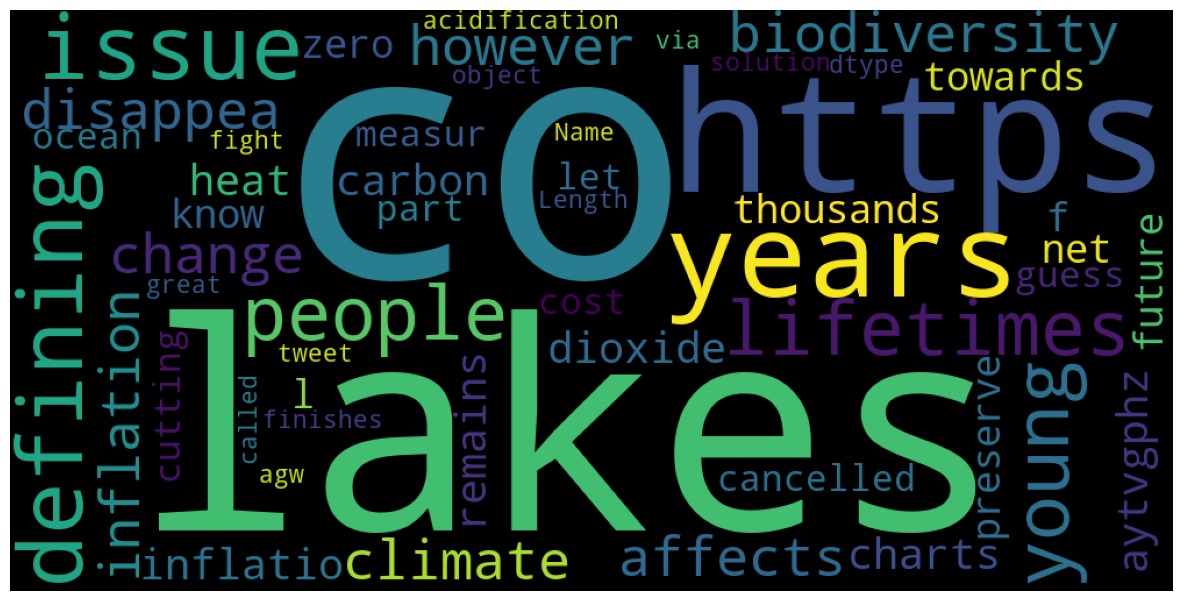

In [28]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [29]:
from nltk.probability import FreqDist
from nltk import flatten
#flatten() function is used to reduce or collapse the given multidimensional array into one dimension array.

In [30]:
tweet_tokens = tweet_tokens.to_list()

In [31]:
tweet_tokens = flatten(tweet_tokens)

In [32]:
tweet_tokens = [w for w in tweet_tokens if len(w)> 2]

In [33]:
tweet_freq = FreqDist(tweet_tokens)

In [34]:
tweet_freq.most_common(100)

[('https', 12156),
 ('climate', 2802),
 ('amp', 2233),
 ('change', 1368),
 ('people', 972),
 ('global', 792),
 ('planet', 715),
 ('new', 682),
 ('world', 656),
 ('countries', 616),
 ('effects', 602),
 ('ice', 551),
 ('causing', 540),
 ('energy', 500),
 ('already', 499),
 ('comes', 472),
 ('today', 461),
 ('worst', 460),
 ('day', 459),
 ('responsible', 459),
 ('read', 455),
 ('least', 455),
 ('facing', 453),
 ('funds', 429),
 ('unlock', 421),
 ('thin', 411),
 ('one', 402),
 ('future', 400),
 ('need', 371),
 ('action', 365),
 ('warming', 359),
 ('like', 352),
 ('years', 350),
 ('help', 341),
 ('carbon', 337),
 ('impact', 330),
 ('emissions', 322),
 ('june', 321),
 ('weather', 320),
 ('via', 317),
 ('time', 315),
 ('earth', 303),
 ('let', 291),
 ('heat', 289),
 ('water', 288),
 ('learn', 286),
 ('impacts', 272),
 ('see', 263),
 ('could', 259),
 ('make', 259),
 ('fossil', 250),
 ('fight', 240),
 ('health', 239),
 ('must', 238),
 ('sustainable', 236),
 ('year', 230),
 ('join', 229),
 ('supp

In [35]:
#remove_words = ['https','via','amp']

In [36]:
#tweet_tokens = [w for w in tweet_tokens if w not in remove_words]

In [37]:
#wordcloud = WordCloud(width = 1000, height = 500, stopwords = stop_english).generate(str(tweet_tokens))

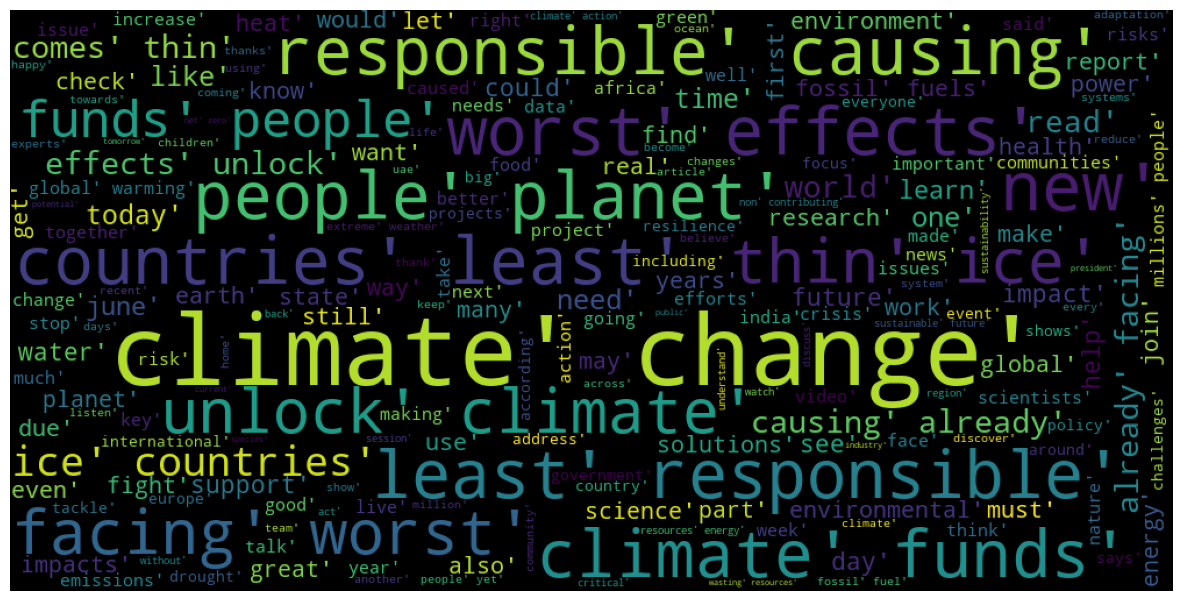

In [38]:
#plt.figure(figsize=(15,10))
#plt.imshow(wordcloud)
#plt.axis('off')
#plt.show()

In [39]:
tweet_freq = FreqDist(tweet_tokens)

In [40]:
tweet_freq.most_common(100)

[('climate', 2802),
 ('change', 1368),
 ('people', 972),
 ('global', 792),
 ('planet', 715),
 ('new', 682),
 ('world', 656),
 ('countries', 616),
 ('effects', 602),
 ('ice', 551),
 ('causing', 540),
 ('energy', 500),
 ('already', 499),
 ('comes', 472),
 ('today', 461),
 ('worst', 460),
 ('day', 459),
 ('responsible', 459),
 ('read', 455),
 ('least', 455),
 ('facing', 453),
 ('funds', 429),
 ('unlock', 421),
 ('thin', 411),
 ('one', 402),
 ('future', 400),
 ('need', 371),
 ('action', 365),
 ('warming', 359),
 ('like', 352),
 ('years', 350),
 ('help', 341),
 ('carbon', 337),
 ('impact', 330),
 ('emissions', 322),
 ('june', 321),
 ('weather', 320),
 ('time', 315),
 ('earth', 303),
 ('let', 291),
 ('heat', 289),
 ('water', 288),
 ('learn', 286),
 ('impacts', 272),
 ('see', 263),
 ('could', 259),
 ('make', 259),
 ('fossil', 250),
 ('fight', 240),
 ('health', 239),
 ('must', 238),
 ('sustainable', 236),
 ('year', 230),
 ('join', 229),
 ('support', 229),
 ('also', 225),
 ('take', 224),
 ('get

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [56]:
DTM = CountVectorizer(max_features=100,ngram_range=(2,2))

In [57]:
tweet_txt_df.tweet = tweet_txt_df.tweet.apply(lambda x: ' '.join(
[word for word in x.split() if word not in (stop_english)]))

In [59]:
tweet_txt_df.tweet = tweet_txt_df.apply(lambda x: ' '.join([word for word in x.split()
                                                           if word not in (['https','via','amp'])]))

AttributeError: 'Series' object has no attribute 'split'

In [ ]:
tweet_txt_df.tweet = tweet_txt_df.tweet.apply(lambda x: ' '.join(
[word for ]))

In [43]:
X_DTM = DTM.fit_transform(tweet_txt_df.tweet)

In [44]:
pd.DataFrame(X_DTM.toarray(), columns=DTM.vocabulary_).head()

,people,change,climate,green,due,use,must,protect,need,new,...,address,much,human,worst,important,facing,thin,causing,unlock,funds
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
y = tweet_txt_df.sentiment
X = X_DTM

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
y = LabelEncoder().fit_transform(y)

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
logit = LogisticRegression(multi_class='multinomial')

In [51]:
logitmodel = logit.fit(X,y)

In [55]:
tweet_txt

['will be the defining issue of the lifetimes of young people meet young leaders from asia and the pacific region who are leading change through legal empowerment awareness campaigns local climate solutions and green entrepreneurship https t co kemskwgjq https t co ost rigjv',
 'lakes are a haven for biodiversity however lakes are disappearing at an alarming rate due to pollution and unsustainable land use we must protect and manage lakes more effectively',
 'climate change affects inflation and inflation is the beast that all central bankers want to tame and discipline christine lagarde to prevent the apocalypse we will need to impose some new taxes yuval noah harari https t co ydcpeherdk https t co yljll jnv',
 'heat is off the charts https t co aytvgphz https t co i xulktnim',
 'carbon dioxide remains for thousands of years false https t co znv jeytqg',
 'gpsandelders the goals of the paris climate agreement you mean the wild goose chase of trying to stop climate changing rotflmao h